# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [101]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = pd.merge(study_results, mouse_metadata)

# Display the data table for preview
complete_data.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
len(complete_data['Mouse ID'].unique())

249

In [3]:
len(complete_data['Timepoint'].unique())

10

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped_ID_data = complete_data.groupby(['Mouse ID'])['Timepoint'].count()
grouped_ID_data.loc[grouped_ID_data > 10]

Mouse ID
g989    13
Name: Timepoint, dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
complete_data.loc[complete_data['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [111]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
complete_data_clean = complete_data.loc[complete_data['Mouse ID'] != 'g989']

In [7]:
# Checking the number of mice in the clean DataFrame.
len(complete_data_clean['Mouse ID'].unique())

248

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_mean = complete_data_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
tumor_median = complete_data_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumor_variance = complete_data_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumor_std = complete_data_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumor_sem = complete_data_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

tumor_statistics_df = pd.DataFrame({
    'Mean Tumor Volume': tumor_mean,
    'Median Tumor Volume': tumor_median,
    'Tumor Volume Variance': tumor_variance,
    'Tumor Volume Std. Dev.': tumor_std,
    'Tumor Volume Std. Err.': tumor_sem
})

tumor_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

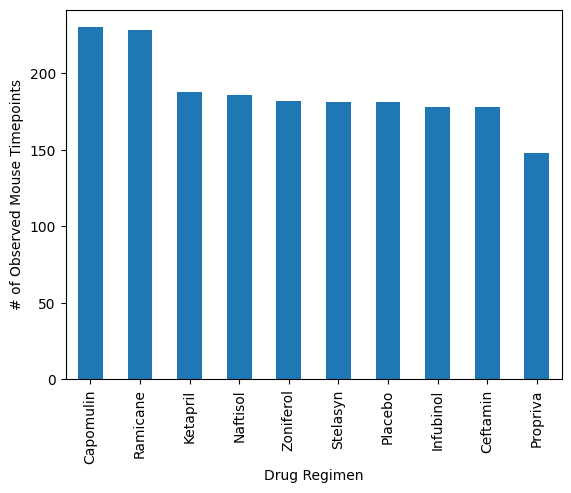

In [66]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_chart = complete_data_clean['Drug Regimen'].value_counts()
bar_chart.plot(kind='bar')
plt.ylabel('# of Observed Mouse Timepoints')

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


Text(0, 0.5, 'Sex')

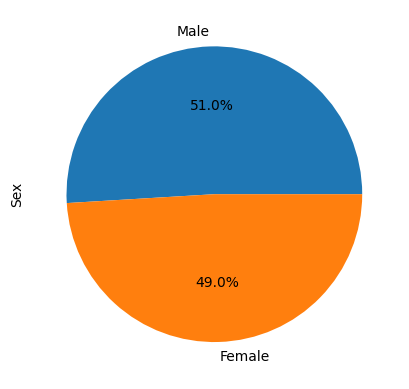

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_chart = complete_data_clean['Sex'].value_counts()
pie_chart.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('Sex')


In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [169]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_clean_ID_data = complete_data_clean.groupby(['Mouse ID'])['Timepoint'].max()
maxTimepoint = pd.DataFrame(grouped_clean_ID_data)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
maxTimepoint_volume = pd.merge(complete_data_clean, maxTimepoint, on=('Mouse ID', 'Timepoint'))

# Individual dataframes
final_tumor_vol_Cap = maxTimepoint_volume.loc[(maxTimepoint_volume['Drug Regimen'] == 'Capomulin')]
final_tumor_vol_Ram = maxTimepoint_volume.loc[(maxTimepoint_volume['Drug Regimen'] == 'Ramicane')]
final_tumor_vol_Inf = maxTimepoint_volume.loc[(maxTimepoint_volume['Drug Regimen'] == 'Infubinol')]
final_tumor_vol_Ceft = maxTimepoint_volume.loc[(maxTimepoint_volume['Drug Regimen'] == 'Ceftamin')]

# Individual series of tumor volume
series_vol_Cap = final_tumor_vol_Cap['Tumor Volume (mm3)']
series_vol_Ram = final_tumor_vol_Ram['Tumor Volume (mm3)']
series_vol_Inf = final_tumor_vol_Inf['Tumor Volume (mm3)']
series_vol_Ceft = final_tumor_vol_Ceft['Tumor Volume (mm3)']


In [178]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
series_vol_all = [series_vol_Cap, series_vol_Ram, series_vol_Inf, series_vol_Ceft]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles_Cap = series_vol_Cap.quantile([.25,.5,.75])
quartiles_Ram = series_vol_Ram.quantile([.25,.5,.75])
quartiles_Inf = series_vol_Inf.quantile([.25,.5,.75])
quartiles_Ceft = series_vol_Ceft.quantile([.25,.5,.75])

lowerq_Cap = quartiles_Cap[0.25]
lowerq_Ram = quartiles_Ram[0.25]
lowerq_Inf = quartiles_Inf[0.25]
lowerq_Ceft = quartiles_Ceft[0.25]

upperq_Cap = quartiles_Cap[0.75]
upperq_Ram = quartiles_Ram[0.75]
upperq_Inf = quartiles_Inf[0.75]
upperq_Ceft = quartiles_Ceft[0.75]

iqr_Cap = upperq_Cap-lowerq_Cap
iqr_Ram = upperq_Ram-lowerq_Ram
iqr_Inf = upperq_Inf-lowerq_Ceft
iqr_Ceft = upperq_Ceft-lowerq_Ceft

    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
lower_bound_Cap = lowerq_Cap - (1.5*iqr_Cap)
upper_bound_Cap = upperq_Cap + (1.5*iqr_Cap)

lower_bound_Ram = lowerq_Ram - (1.5*iqr_Ram)
upper_bound_Ram = upperq_Ram + (1.5*iqr_Ram)

lower_bound_Inf = lowerq_Inf - (1.5*iqr_Inf)
upper_bound_Inf = upperq_Inf + (1.5*iqr_Inf)

lower_bound_Ceft = lowerq_Ceft - (1.5*iqr_Ceft)
upper_bound_Ceft = upperq_Ceft + (1.5*iqr_Ceft)

# Diplay potential outliers for each treatment
print(f"Capomulin's outlier bounds: {lower_bound_Cap}, {upper_bound_Cap}")
print(f"Ramicane's outlier bounds: {lower_bound_Ram}, {upper_bound_Ram}")
print(f"Infubinol's outlier bounds: {lower_bound_Inf}, {upper_bound_Inf}")
print(f"Ceftamin's outlier bounds: {lower_bound_Ceft}, {upper_bound_Ceft}")

Capomulin's outlier bounds: 20.70456164999999, 51.83201549
Ramicane's outlier bounds: 17.912664470000003, 54.30681135
Infubinol's outlier bounds: 28.843110189999994, 90.73124035000001
Ceftamin's outlier bounds: 25.355449580000002, 87.66645829999999


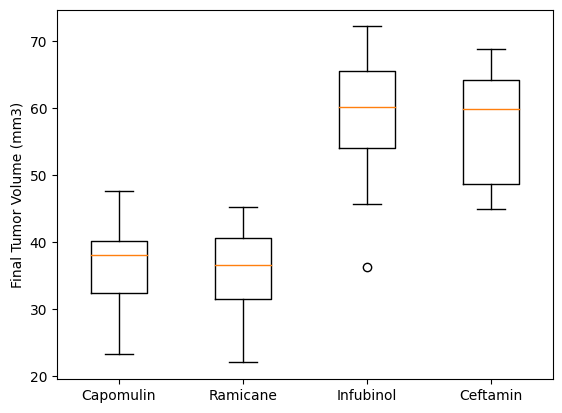

In [176]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1= plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(series_vol_all, labels = treatments)
plt.show()




## Line and Scatter Plots

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
